### Extract reviews of (Diapers) product from ecommerce website like  amazon
#link:https://www.amazon.in/Papimo-Diapers-Pants-Monthly-Extra/product-reviews/B07TL5M3M2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

In [1]:
#Importing necessary libraries
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re # regular expressions 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# creating empty reviews list 
diaper_reviews =[]

In [3]:
for i in range(1,20):
  ip=[]  
  url = "https://www.amazon.in/Papimo-Diapers-Pants-Monthly-Extra/product-reviews/B07TL5M3M2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("div",attrs={"class","a-section review aok-relative"})
  # Extracting the content under specific tags  
# Extracting the content under specific tags    
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
diaper_reviews=diaper_reviews+ip   # adding the reviews of one page to empty list which in future contains all the reviews

In [4]:
ip_rev_string = " ".join(diaper_reviews)

In [5]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [6]:
# words that contained in reviews
ip_reviews_words = ip_rev_string.split(" ")

In [7]:
#stop_words = stopwords.words('english')
with open("C:\\Users\\Raja\\Downloads\\excelr\\STEP-WISE\\textmining\\stop.txt","r") as sw:
    stopwords = sw.read()
stopwords = stopwords.split("\n")

In [8]:
#stp_wrds = stopwords+stop_words
temp = ["this","is","awsome","diaper","worst"]
[i for i in temp if i not in "is"]
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

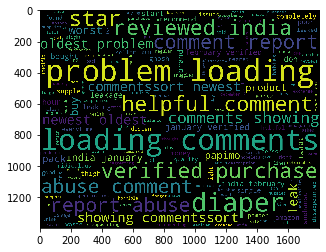

In [9]:
# Joinining all the reviews into single paragraph 
ip_rev_string =" ".join(ip_reviews_words)
wordcloud_ip = WordCloud(background_color='black',width=1800,height=1400).generate(ip_rev_string)
plt.imshow(wordcloud_ip)

In [10]:
# positive words # Choose the path for +ve words stored in system
with open("C:\\Users\\Raja\\Downloads\\excelr\\STEP-WISE\\textmining\\positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")  
poswords = poswords[36:]

In [11]:
# negative words  Choose path for -ve words stored in system
with open("C:\\Users\\Raja\\Downloads\\excelr\\STEP-WISE\\textmining\\negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")
negwords = negwords[37:]

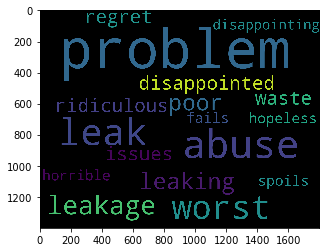

In [12]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])
wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.imshow(wordcloud_neg_in_neg)

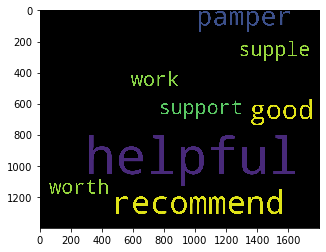

In [13]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)